<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Polynomial_Regression(task_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Real estate.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
print(df.head())  # Display the first few rows

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [ ]:
print(df.info())  # Display information about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [ ]:
print(df.describe())  # Display summary statistics

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

A simple linear regression algorithm only works when the relationship between the data is linear. But suppose we have non-linear data, then linear regression will not be able to draw a best-fit line.
we introduce polynomial regression to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.
Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables, we add some polynomial terms to linear regression to convert it into Polynomial regression.

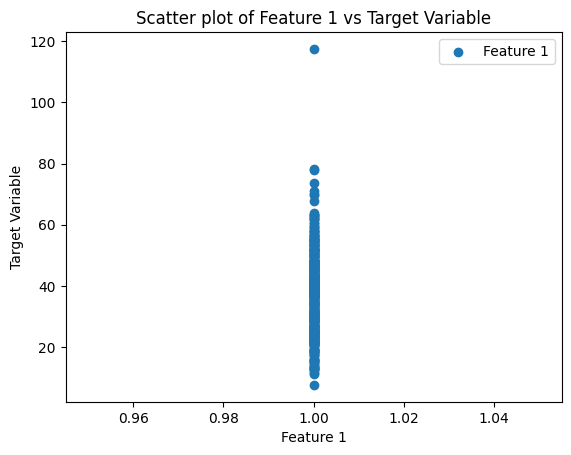

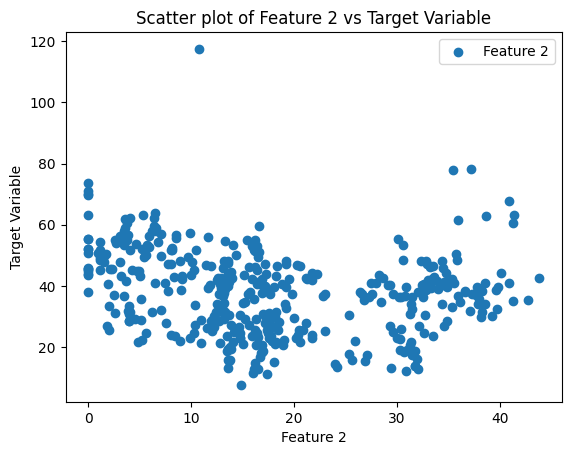

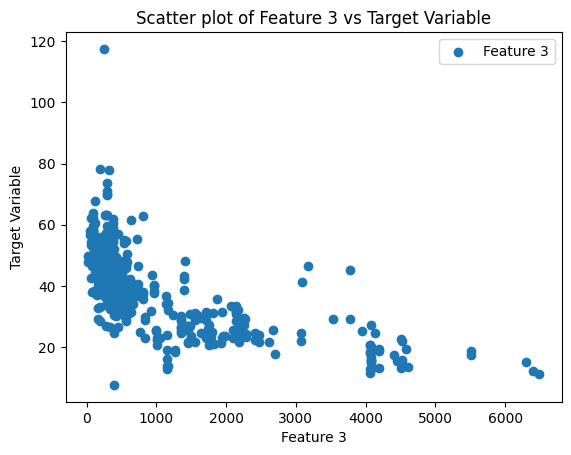

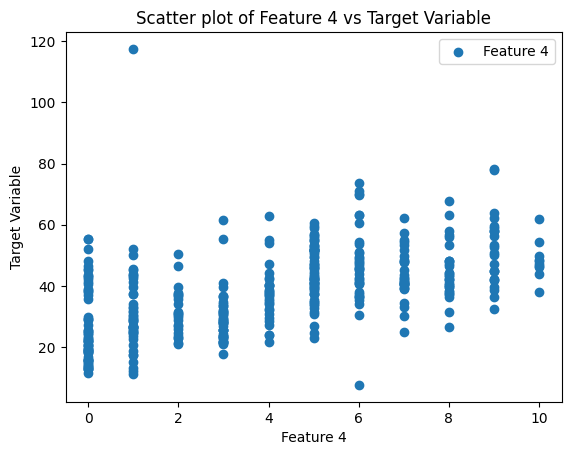

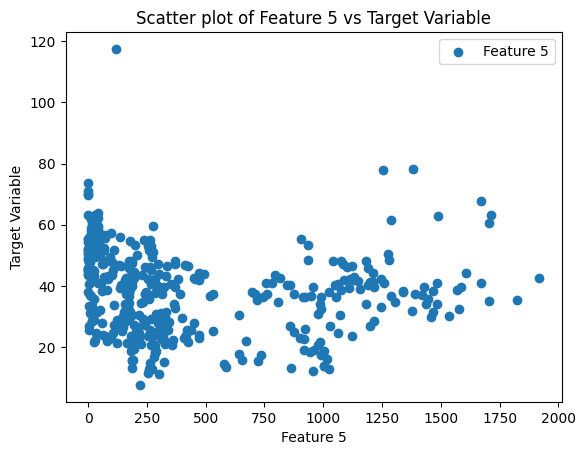

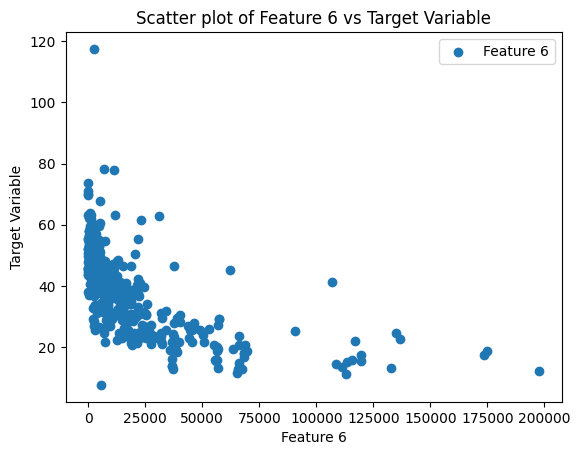

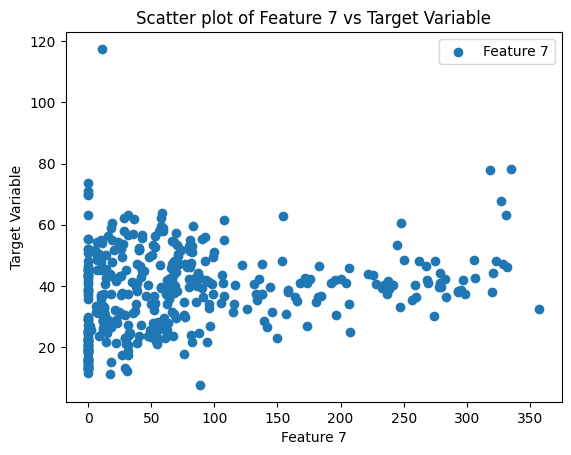

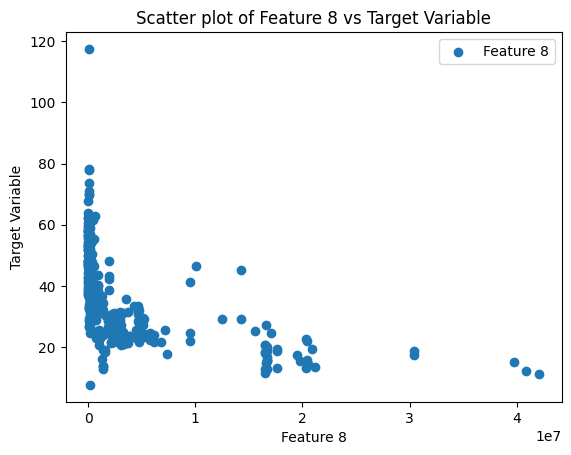

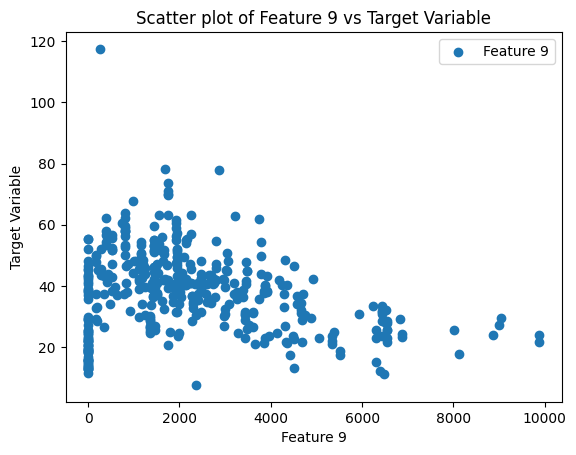

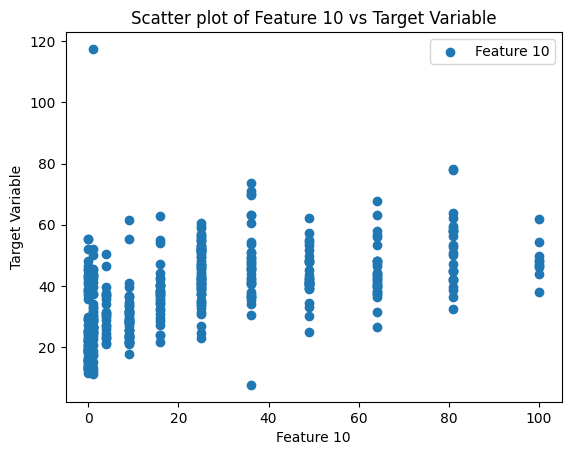

In [ ]:
# Assuming 'X' contains the independent variables and 'y' contains the target variable
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]  # Select features for regression
y = df['Y house price of unit area']  # Select target variable

# Perform polynomial feature transformation
degree = 2  # Define the degree of polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Now, X_poly contains the original features as well as their polynomial combinations

# Visualize relationships between polynomial features and the target variable
for i in range(X_poly.shape[1]):
    plt.scatter(X_poly[:, i], y, label=f'Feature {i+1}')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target Variable')
    plt.title(f'Scatter plot of Feature {i+1} vs Target Variable')
    plt.legend()
    plt.show()



In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and fit Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train R^2 score: {train_score}")
print(f"Test R^2 score: {test_score}")


Train R^2 score: 0.5956627096707356
Test R^2 score: 0.7147044027097067


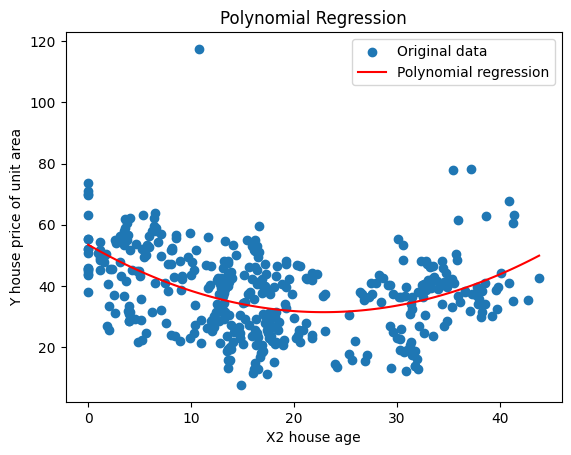

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/drive/MyDrive/Real estate.csv")

# Assuming you want to predict house prices based on a single feature, say 'X1'
X = df[['X2 house age']].values
y = df['Y house price of unit area'].values

# Fit polynomial regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Visualize the polynomial regression
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

plt.scatter(X, y, label='Original data')
plt.plot(X_new, y_new, color='red', label='Polynomial regression')
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.title('Polynomial Regression')
plt.legend()
plt.show()